Importing the libraries

In [2]:
import keras
from datasets import load_dataset
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras import backend as K
import numpy as np

dataset = load_dataset("ernestchu/emnist-digits")
train_data = dataset["train"]
test_data = dataset["test"]

print(train_data.shape, test_data.shape)

(240000, 2) (40000, 2)


In [3]:
def hf_to_numpy(split):
    images = []
    labels = []

    for item in split:
        images.append(np.array(item["image"]))
        labels.append(item["label"])

    return np.array(images), np.array(labels)

x_train, y_train = hf_to_numpy(train_data)
x_test, y_test = hf_to_numpy(test_data)
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Data Preprocessing


In [4]:
# fixing HF orientation issues
#x_train = np.rot90(x_train, k=0, axes=(1,2))
#x_train = np.fliplr(x_train)

#x_test = np.rot90(x_test, k=0, axes=(1,2))
#x_test = np.fliplr(x_test)

num_classes=10

#Normalize and reshape
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (240000, 28, 28, 1)
240000 train samples
40000 test samples


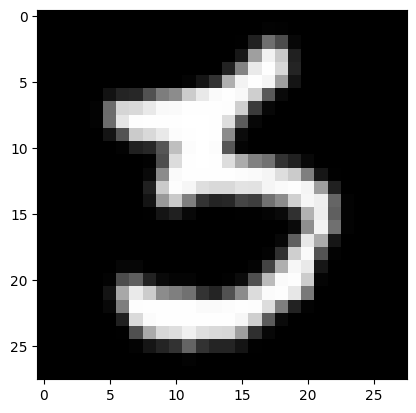

In [6]:
import matplotlib.pyplot as plt
# Check the image AFTER your rotation fix
# It should look like a perfect, upright '8'
plt.imshow(x_train[3].reshape(28,28), cmap='gray')
plt.show()

In [7]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

# y_train should be (240000, 10)
# x_train should be (240000, 28, 28, 1)

x_train shape: (240000, 28, 28, 1)
y_train shape: (240000, 10)


Model Creation

In [10]:
batch_size = 128
num_classes = 10
epochs = 5

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate=0.01),
              metrics=['accuracy'])

Model Training

In [11]:
hist = model.fit(x_train, y_train,batch_size=128,epochs=5,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")

model.save('emnist_ds.keras')
print("Saving the model as emnist_ds.keras")

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 140s 74ms/step - accuracy: 0.9576 - loss: 0.1412 - val_accuracy: 0.9870 - val_loss: 0.0426
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 138s 74ms/step - accuracy: 0.9815 - loss: 0.0625 - val_accuracy: 0.9901 - val_loss: 0.0325
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 150s 80ms/step - accuracy: 0.9851 - loss: 0.0503 - val_accuracy: 0.9920 - val_loss: 0.0267
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 148s 79ms/step - accuracy: 0.9872 - loss: 0.0436 - val_accuracy: 0.9930 - val_loss: 0.0236
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 152s 81ms/step - accuracy: 0.9884 - loss: 0.0390 - val_accuracy: 0.9934 - val_loss: 0.0227
The model has successfully trained
Saving the model as emnist_ds.keras


Model Evaluation

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.summary()

Test loss: 0.022699696943163872
Test accuracy: 0.9933750033378601


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,382,348 (9.09 MB)

 Trainable params: 2,381,642 (9.09 MB)

 Non-trainable params: 704 (2.75 KB)

 Optimizer params: 2 (12.00 B)

In [13]:
y_train.max(), y_train.min()

(np.float64(1.0), np.float64(0.0))

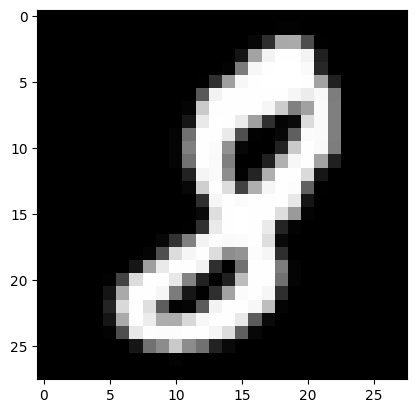

In [11]:
import matplotlib.pyplot as plt

# Load a raw image directly from the dataset (before any processing)
raw_image = x_train[0] 

# Show it
plt.imshow(raw_image, cmap='gray')
plt.show()